In [24]:
#import python packages
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
#define the x's range for plotting
x=np.arange(-120, 80, 0.1)

In [26]:
#define f(x) based on the function 
def f(x): 
    return x**4+200*(x+2000)**2+10000

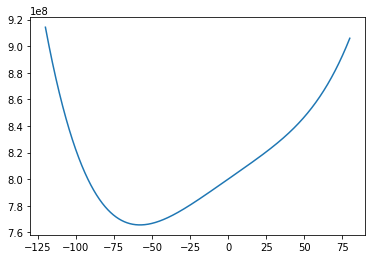

In [27]:
#plot x vs. f(x)
plt.plot(x,f(x))

In [28]:
#define the derivative of f(x) over x ---> f'(x)
def derivative(x):
    return 4*x**3+400*(x+2000)

In [35]:
#define a function to find the minimum of f(x) 
def find_optimum(x_old,x_new,gamma,precisions):
    # store each update in x_search
    x_search = [x_new]

    #keep searchhing until the values converge within the precision
    while abs(x_new - x_old) > precisions :
        # use x_old to keep the x value before the update
        x_old = x_new
        
        # update x_new
        x_new = x_old - (gamma * derivative(x_old))
            
        # record the udpates in x_search array
        x_search.append(x_new)
    
    #print out the result and plot the decreasing trend of f(x) vs iternations
    print(str(len(x_search)) + " iterations")
    print("The local minimum occurs at " + str(x_new))
    print("Gamma: " + str(gamma))
    # change x_search array to np array for plotting
    x_search = np.array(x_search)
    plt.plot(x_search, f(x_search))

779 iterations
The local minimum occurs at -57.9103810074016
Gamma: 1e-06


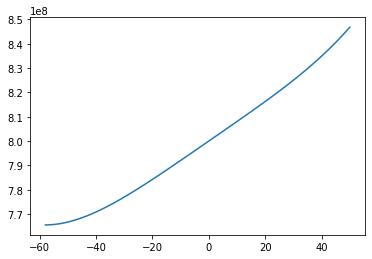

In [36]:
x_old = 70 # old value
x_new = 50 # new value
gamma = 0.000001  # gamma value which is a guess for now
precision = 1e-12 # precision point
find_optimum(x_old,x_new,gamma,precision)  #call the function 

In [37]:
def adaptive_optimum(x_old, x_new, gamma, t, precision):
    
    #nextIter is the flag for continuing or stopping the loop
    nextIter = True
    
    #keep searching until nextIter is set to false
    while nextIter:
        
        #decrease the value of gamma in each iteration
        gamma *= t
        
        #create a local copy of x_old and x_new in each iteration
        #it's because we can want any change to x_new and x_old to 
        #affect the calculation in the next iternation 
        x_old_try = x_old 
        x_new_try = x_new 
        
        #try 10000 times to see if x converges
        for i in range(10000):
            #use x_old_try to keep the value of x before the update
            x_old_try = x_new_try          
            
            try:
                # update x_new_try with the new gamma value
                x_new_try = x_old_try - (gamma * derivative(x_old_try))
                
                # if the new gamma values are less than precision print output make iteration false 
                # and break the loop all together.
                if abs(x_new_try - x_old_try) < precision:
                    print("Found gamma: {:0.4e}".format(gamma))
                    print("The minimum is at: x = " + str(round(x_new_try, 2)))
                    print("The minimum of f(x) is: {:0.3e}".format(f(x_new_try)))
                    nextIter = False
                    break              
                
            # if there is an error, such as "value too large" error, stop the
            # iternation and try next gamma
            except:                          
                break 

In [38]:
x_old = 70 # old value
x_new = 50 # new value

# precision point
precision = 1e-12

# decrease rate of gamma
t=0.9

# gamma value, set high
gamma = 1

#call the function
adaptive_optimum(x_old, x_new, gamma, t, precision)

Found gamma: 4.4982e-05
The minimum is at: x = -57.91
The minimum of f(x) is: 7.656e+08
